In [23]:
import cobra
import numpy as np
from re import sub, search, findall
from math import floor
import matplotlib.pyplot as plt
import pandas as pd
model_path = "iCHOv1_final.xml"
model = cobra.io.read_sbml_model(model_path) 

In [2]:
model.medium

{'EX_arg_L_e_': 0.02013,
 'EX_asn_L_e_': 0.04058,
 'EX_asp_L_e_': 0.00976,
 'EX_cys_L_e_': 0.00539,
 'EX_glc_e_': 0.1979,
 'EX_gln_L_e_': 0.0674,
 'EX_h2o_e_': 1000.0,
 'EX_hco3_e_': 1000.0,
 'EX_his_L_e_': 0.00407,
 'EX_ile_L_e_': 0.01055,
 'EX_leu_L_e_': 0.01567,
 'EX_lys_L_e_': 0.01403,
 'EX_met_L_e_': 0.00632,
 'EX_o2_e_': 1.125,
 'EX_phe_L_e_': 0.00592,
 'EX_pi_e_': 1000.0,
 'EX_pro_L_e_': 0.00847,
 'EX_ser_L_e_': 0.04813,
 'EX_so4_e_': 1000.0,
 'EX_thr_L_e_': 0.01058,
 'EX_trp_L_e_': 0.0032,
 'EX_tyr_L_e_': 0.00982,
 'EX_val_L_e_': 0.01246}

In [3]:
#model.objective = "biomass_cho_producing"
model.id = "iCHOv1_221107_producing"
model.name = "iCHOv1_221107_producing"
model

Name,iCHOv1_221107_producing
Memory address,1c8b83e5960
Number of metabolites,4456
Number of reactions,6663
Number of genes,1766
Number of groups,121
Objective expression,1.0*biomass_cho_producing - 1.0*biomass_cho_producing_reverse_3e80b
Compartments,"endoplasmic reticulum, cytosol, mitochondria, peroxisome, golgi apparatus, extracellular space, nucleus, lysosome, intermembrane space of the mitochondria"


In [4]:
for r in model.reactions:
    if "igg" in r.id:
        r.upper_bound = 1000
        print(r.bounds)
        #r.remove_from_model(remove_orphans = True)

(0.0, 1000)
(0.0, 1000)
(0.0, 1000)
(1.303e-05, 1000)


In [5]:
sol = model.optimize()
sol.fluxes["biomass_cho_producing"]

0.022871477092250847

In [6]:
model.medium#["EX_cys_L_e"]

{'EX_arg_L_e_': 0.02013,
 'EX_asn_L_e_': 0.04058,
 'EX_asp_L_e_': 0.00976,
 'EX_cys_L_e_': 0.00539,
 'EX_glc_e_': 0.1979,
 'EX_gln_L_e_': 0.0674,
 'EX_h2o_e_': 1000.0,
 'EX_hco3_e_': 1000.0,
 'EX_his_L_e_': 0.00407,
 'EX_ile_L_e_': 0.01055,
 'EX_leu_L_e_': 0.01567,
 'EX_lys_L_e_': 0.01403,
 'EX_met_L_e_': 0.00632,
 'EX_o2_e_': 1.125,
 'EX_phe_L_e_': 0.00592,
 'EX_pi_e_': 1000.0,
 'EX_pro_L_e_': 0.00847,
 'EX_ser_L_e_': 0.04813,
 'EX_so4_e_': 1000.0,
 'EX_thr_L_e_': 0.01058,
 'EX_trp_L_e_': 0.0032,
 'EX_tyr_L_e_': 0.00982,
 'EX_val_L_e_': 0.01246}

### The peptide sequences for 221-107, sent by Leon Pybus March 2023, are:
>Anti-MUC1_HC QMQLVQSGAEVKKPGASVKVSCKASGYTFTGHYMHWVRQAPGQGLEWMGWIDPVTGGTKYAQNFQGWVTMTRDTSIRTAYMELSRLRSDDTAMYYCAREVTGDRGQFDKWGQGTLVTVASASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCDKTHTCPPCPAPELLGGPSVFLFPPKPKDTLMISRTPEVTCVVVDVSHEDPEVKFNWYVDGVEVHNAKTKPREEQYNSTYRVVSVLTVLHQDWLNGKEYKCKVSNKALPAPIEKTISKAKGQPREPQVYTLPPSRDELTKNQVSLTCLVKGFYPSDIAVEWESNGQPENNYKTTPPVLDSDGSFFLYSKLTVDKSRWQQGNVFSCSVMHEALHNHYTQKSLSLSPGK

N. residues = 450,
MW = 49484.07,
Formula = C2201H3415N591O670S19

>Anti-MUC1_LC QSVLTQPPSVSVAPGKTARITCGGNNIGSKSVHWYQQKPGQAPVLVIYYDSDRPSGIPERFSGSNSGNTATLTISRVEAGDEADYYCQVWDSSSDWVFGGGTKLTVLGQPKAAPSVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADSSPVKAGVETTTPSKQSNNKYAASSYLSLTPEQWKSHRSYSCQVTHEGSTVEKTVAPTECS

N. residues = 213,
MW = 22687.70,
Forumla = C998H1545N269O326S5

### To add the IgG product to the model, several aspects need altering:
#### 1. The igg_hc and igg_lc reactions, which define the amino acids used in the formation
The number of amino acids can be counted using: https://spin.niddk.nih.gov/clore/Software/A205.html

However it was more complicated to calculate the biproducts of translation. 
_"The formation of a peptide bond from amino acids does not directly involve the hydrolysis of ATP or GTP. Rather, peptide bond formation requires the condensation of two amino acids, which results in the release of a molecule of water._

_However, the synthesis of aminoacyl-tRNA molecules, which are required for protein synthesis and peptide bond formation, does involve the hydrolysis of ATP or GTP. Specifically, the aminoacyl-tRNA synthetase enzymes that attach amino acids to tRNA molecules use ATP or GTP to drive the reaction forward and ensure that the correct amino acid is attached to the tRNA. In some cases, multiple molecules of ATP or GTP may be hydrolyzed during this process._

_Once an aminoacyl-tRNA molecule is formed, it can be used by the ribosome to synthesize a peptide chain through a series of peptide bond formation reactions, which do not require additional hydrolysis of ATP or GTP."_

I asked ChatGPT how o calculate the amount of ATP/ADP/GTP/GDP/Pi/PPI/H20 to include in the reaction:

_"Calculating the exact amount of ATP or GTP hydrolyzed to form aminoacyl-tRNA molecules used in the production of a specific peptide would depend on several factors, including the length of the peptide, the specific amino acids involved, and the efficiency of the aminoacyl-tRNA synthetase enzymes._

_However, it is possible to estimate the amount of ATP or GTP that is hydrolyzed during protein synthesis by looking at the overall energy requirements of the process. It is estimated that each aminoacyl-tRNA formed requires the hydrolysis of at least two molecules of ATP or GTP. Additionally, each peptide bond formed during protein synthesis releases the equivalent of one molecule of inorganic phosphate (Pi), which is derived from the hydrolysis of ATP or GTP._

_Therefore, to estimate the amount of ATP or GTP hydrolyzed during the production of a specific peptide, you would need to know the number of amino acids in the peptide, and use this to calculate the number of peptide bonds that are formed. Then, you could multiply this number by two to estimate the minimum number of ATP or GTP molecules that are required for the synthesis of the corresponding aminoacyl-tRNA molecules. Finally, you could add the number of peptide bonds to the estimated number of ATP or GTP molecules to get an estimate of the total number of ATP or GTP molecules that are hydrolyzed during the production of the peptide._

_It is important to note that this is only an estimate, and the actual number of ATP or GTP molecules hydrolyzed during protein synthesis may vary depending on several factors."_

I calculated that, in the original iCHO2448 reactions, the amount of AMP + PPi was equal to the peptide_length of the construct, the amount of H and Pi was peptide_length * 2 -1, GDP was peptide_length * 2 - 2

In [8]:
def calculateATPGTP(peptide_length):
    amp = ppi = peptide_length
    h = pi   = peptide_length * 2 - 1
    gdp = peptide_length * 2 - 2
    return {
        "ATP/AMP": amp,
        "GTP/GDP": gdp,
        "h/h20": h,
        "ppi": ppi,
        "pi": pi
    }

print("Values for igg_hc =", calculateATPGTP(450),
      "\n Values for igg_lc = ", calculateATPGTP(213))


Values for igg_hc = {'ATP/AMP': 450, 'GTP/GDP': 898, 'h/h20': 899, 'ppi': 450, 'pi': 899} 
 Values for igg_lc =  {'ATP/AMP': 213, 'GTP/GDP': 424, 'h/h20': 425, 'ppi': 213, 'pi': 425}


In [9]:
unannotated = 0
annotated = 0
for r in model.reactions:
    if str(r.gpr) == "":
        unannotated += 1
    else:
        annotated += 1
annotated/sum([unannotated, annotated]) * 100

48.46165390965031

In [10]:
#model.reactions.get_by_id("igg_formation")
model.metabolites.get_by_id("igg_g").formula

In [11]:
igg_hc_reaction = "22.0 ala_L_c + 13.0 arg_L_c + 16.0 asn_L_c + 19.0 asp_L_c + 450.0 atp_c + 11.0 cys_L_c + 20.0 gln_L_c + 21.0 glu_L_c + 32.0 gly_c + 898.0 gtp_c + 899.0 h2o_c + 11.0 his_L_c + 7.0 ile_L_c + 31.0 leu_L_c + 34.0 lys_L_c + 8.0 met_L_c + 13.0 phe_L_c + 34.0 pro_L_c + 47.0 ser_L_c + 38.0 thr_L_c + 10.0 trp_L_c + 18.0 tyr_L_c + 45.0 val_L_c --> adp_c + 450 amp_c + 898.0 gdp_c + 899.0 h_c + 899.0 pi_c + 450.0 ppi_c + igg_hc_r"
igg_lc_reaction = "17.0 ala_L_c + 5.0 arg_L_c + 7.0 asn_L_c + 8.0 asp_L_c + 213.0 atp_c + 5.0 cys_L_c + 11.0 gln_L_c + 10.0 glu_L_c + 16.0 gly_c + 424.0 gtp_c + 425.0 h2o_c + 3.0 his_L_c + 6.0 ile_L_c + 11.0 leu_L_c + 12.0 lys_L_c + 4.0 phe_L_c + 16.0 pro_L_c + 30.0 ser_L_c + 19.0 thr_L_c + 5.0 trp_L_c + 9.0 tyr_L_c + 19.0 val_L_c --> adp_c + 213.0 amp_c + 424.0 gdp_c + 425.0 h_c + 213.0 pi_c + 425.0 ppi_c + igg_lc_r"
new_reactions = {}
for rxn in [igg_hc_reaction, igg_lc_reaction]:
    left, right = rxn.split(" --> ")
    molecules_left = left.split(" + ")
    molecules_right = right.split(" + ")

    molecule_counts_left = {}
    molecule_counts_right = {}

    for molecule in molecules_left:
        if " " in molecule:
            count, name = molecule.split(" ")
        else:
            count, name = [1, molecule]
            
        if name in molecule_counts_left:
            molecule_counts_left[name] += float(count)
        else:
            molecule_counts_left[name] = float(count) 
    for molecule in molecules_right:
        if " " in molecule:
            count, name = molecule.split(" ")
        else:
            count, name = [1, molecule]
    
        if name in molecule_counts_right:
            molecule_counts_right[name] += float(count) 
        else:
            molecule_counts_right[name] = float(count) 

    new_reaction = ""
    left_mols = []
    for mol in molecule_counts_left.keys():
        left_mols.append(str(molecule_counts_left[mol]) + " " + mol)
        #new_reaction = new_reaction + str(molecule_counts_left[mol]) + " " + mol + " + "
    right_mols = []
    for mol in molecule_counts_right.keys():
        right_mols.append(str(molecule_counts_right[mol]) + " " + mol)

    new_reaction = " + ".join(left_mols) + " --> " + " + ".join(right_mols)

    new_reactions[molecules_right[len(molecules_right)-1]] = new_reaction
model.reactions.get_by_id("igg_hc").reaction = new_reactions["igg_hc_r"]
model.reactions.get_by_id("igg_lc").reaction = new_reactions["igg_lc_r"]
#    
#new_reaction = " + ".join(left_mols) + " --> " + " + ".join(right_mols) + " + igg_g"

In [12]:
igg_lc_formula = "C998H1545N269O326S5"
igg_hc_formula = "C2201H3415N591O670S19"

model.metabolites.get_by_id("igg_lc_r").formula = igg_lc_formula
model.metabolites.get_by_id("igg_hc_r").formula = igg_hc_formula

formulas = [igg_lc_formula, igg_hc_formula]
formula_counts = dict(
    C = 0,
    H = 0,
    N = 0,
    O = 0,
    S = 0
)
for formula in formulas:        
    matches = findall(r"([A-Z][a-z]*)(\d*)", formula)
    for match in matches:
            element = match[0]
            count = int(match[1]) if match[1] else 1
            if element in formula_counts:
                formula_counts[element] += count * 2 ## Because there are two chains
            else:
                formula_counts[element] = count * 2 ## Because there are two chains
igg_formula = ""
for element, count in formula_counts.items():
    igg_formula += element + str(count)
model.metabolites.get_by_id("igg_g").formula = igg_formula
#model.metabolites.get_by_id("ICproduct_c_").formula = new_formula
#model.metabolites.get_by_id("ICproduct_c_").formula

In [13]:
sol = model.optimize()
sol.fluxes["biomass_cho_producing"]

0.02320267885543381

# Auxotrophies

In [18]:
auxotrophies = [
    "EX_cys_L(e)",  # CHO specific
    "EX_pro_L(e)",  # CHO specific
    "EX_arg_L(e)",  # CHO specific
    "EX_his_L(e)",
    "EX_ile_L(e)",
    "EX_leu_L(e)",
    "EX_lys_L(e)",
    "EX_met_L(e)"
]


ov = {}

for rxn in model.medium.keys():
    model1 = model.copy()  # Make a copy of the original model to avoid modifying it
    
    

    model1.reactions.get_by_id(rxn).bounds = (0,0)  # complete the code: set lower and upper bound of each reaction to 0
    solution = model1.optimize()
    ov[rxn] = solution.objective_value
    
ov

Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp_4jcps60.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp6x8tsxrs.lp
Reading time = 0.12 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp5ar5jrkc.lp
Reading time = 0.17 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpgosi67ml.lp
Reading time = 0.19 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpqljlv6z9.lp
Reading time = 0.16 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpzjqmhef8.lp
Reading time = 0.18 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpok8b2

c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp5itylu_e.lp
Reading time = 0.08 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp61qv6iz2.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp4dgv0ksr.lp
Reading time = 0.05 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpxyj3wzl7.lp
Reading time = 0.06 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp45aong34.lp
Reading time = 0.07 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpudq9e0v3.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp4jd989hr.lp
Reading time = 0.05 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp07fs8fg2.lp
Reading time = 0.08 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp2y69z0k_.lp
Reading time = 0.07 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpdc1xr9qf.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp0f07par5.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpth9_rbbf.lp
Reading time = 0.06 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpr25cwusn.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpuesm47i3.lp
Reading time = 0.08 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


{'EX_arg_L_e_': 0.02320267885543381,
 'EX_asn_L_e_': 0.02320267885543381,
 'EX_asp_L_e_': 0.023202678855433808,
 'EX_cys_L_e_': 0.02320267885543381,
 'EX_glc_e_': 0.014787463504792897,
 'EX_gln_L_e_': 0.018162705918462845,
 'EX_h2o_e_': 0.02320267885543381,
 'EX_hco3_e_': 0.02320267885543381,
 'EX_his_L_e_': None,
 'EX_ile_L_e_': None,
 'EX_leu_L_e_': None,
 'EX_lys_L_e_': None,
 'EX_met_L_e_': None,
 'EX_o2_e_': None,
 'EX_phe_L_e_': None,
 'EX_pi_e_': 0.02280392446800596,
 'EX_pro_L_e_': 0.02320267885543381,
 'EX_ser_L_e_': 0.02320267885543381,
 'EX_so4_e_': 0.02320267885543381,
 'EX_thr_L_e_': None,
 'EX_trp_L_e_': None,
 'EX_tyr_L_e_': 0.01187468059505848,
 'EX_val_L_e_': None}

# Amino acid sensitivity

In [19]:
# Create an empty dictionary to save the simulation results
aa_sensitivity_data = {}

aa = ["arg", "asn", "asp", "cys", "gln", "his", "ile", "leu", "lys", "met", "phe", "pro", "ser", "thr", "trp", "tyr", "val"]
aa_rxn = []
for x in model.medium.keys():
    for y in aa:
        if y in x:
            aa_rxn.append(x)
aa_rxn

for rxn in aa_rxn:
    model1 = model.copy()  # Make a copy of the original model to avoid modifying it
    results = []  # Create an empty list to store results for the current amino acid
    
    
    for i in [x / 1000 for x in range(0, 20, 2)]:
        model1.reactions.get_by_id(rxn).bounds = (-i,-i)
            
        solution = model1.optimize()
        results.append(solution.objective_value)  # Store the fluxes from this simulation

    aa_sensitivity_data[rxn] = results  # Store results for this amino acid in the dictionary

# Create a DataFrame from the dictionary
df = pd.DataFrame(aa_sensitivity_data)
df

Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpzxlbwy3t.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpls3qauau.lp
Reading time = 0.08 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpuqpw44zf.lp
Reading time = 0.22 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmppuzufjxj.lp
Reading time = 0.18 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp1qfp1azv.lp
Reading time = 0.08 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpihy3jglx.lp
Reading time = 0.10 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp0ubmiwlm.lp
Reading time = 0.08 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpbhril4vy.lp
Reading time = 0.06 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpnqsj5zjw.lp
Reading time = 0.07 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp258w5w3e.lp
Reading time = 0.04 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp5ti87lty.lp
Reading time = 0.05 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmpy9du_ns9.lp
Reading time = 0.07 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp3v4xx0gw.lp
Reading time = 0.07 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp7pgb2bjr.lp
Reading time = 0.06 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp1nnzjvky.lp
Reading time = 0.06 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp759_pz9f.lp
Reading time = 0.06 seconds
: 4456 rows, 13326 columns, 55294 nonzeros
Read LP format model from file C:\Users\mfbx2jw5\AppData\Local\Temp\tmp7h9_9qrn.lp
Reading time = 0.03 seconds
: 4456 rows, 13326 columns, 55294 nonzeros


c:\Users\mfbx2jw5\AppData\Local\anaconda3\envs\cobra\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


,EX_arg_L_e_,EX_asn_L_e_,EX_asp_L_e_,EX_cys_L_e_,EX_gln_L_e_,EX_his_L_e_,EX_ile_L_e_,EX_leu_L_e_,EX_lys_L_e_,EX_met_L_e_,EX_phe_L_e_,EX_pro_L_e_,EX_ser_L_e_,EX_thr_L_e_,EX_trp_L_e_,EX_tyr_L_e_,EX_val_L_e_
0,0.023203,0.023203,0.023203,0.023203,0.018163,NaN,NaN,NaN,NaN,NaN,NaN,0.023203,0.023203,NaN,NaN,0.011875,NaN
1,0.023203,0.023203,0.023203,0.023203,0.018603,0.013443,0.005968,0.001676,0.001635,0.013422,0.006596,0.023203,0.023203,0.001594,0.023203,0.016850,0.000814
2,0.023203,0.023203,0.023203,0.023203,0.019044,0.023203,0.013154,0.005379,0.005716,0.023203,0.015069,0.023203,0.023203,0.007789,0.023203,0.021825,0.005718
3,0.023203,0.023203,0.023203,0.023203,0.019485,0.023203,0.020339,0.009081,0.009797,0.023203,0.023542,0.023203,0.023203,0.013984,0.023203,0.023203,0.010622
4,0.023203,0.023203,0.023203,0.023203,0.019926,0.023203,0.023203,0.012784,0.013879,0.023203,0.026183,0.023203,0.023203,0.020179,0.023203,0.023203,0.015525
5,0.023203,0.023203,0.023203,0.023203,0.020367,0.023203,0.023203,0.016486,0.017960,0.023203,0.026183,0.023203,0.023203,0.023203,0.023203,0.023203,0.020429
6,0.023203,0.023203,0.023203,0.023203,0.020807,0.023203,0.023203,0.020189,0.022041,0.023203,0.026183,0.023203,0.023203,0.023203,0.023203,0.023203,0.023203
7,0.023203,0.023203,0.023203,0.023203,0.021248,0.023203,0.023203,0.023203,0.023203,0.023203,0.026183,0.023203,0.023203,0.023203,0.023203,0.023203,0.023203
8,0.023203,0.023203,0.023203,0.023203,0.021689,0.023203,0.023203,0.023203,0.023203,0.023203,0.026183,0.023203,0.023203,0.023203,0.023203,0.023203,0.023203
9,0.023203,0.023203,0.023203,0.023203,0.022130,0.023203,0.023203,0.023203,0.023203,0.023203,0.026183,0.023203,0.023203,0.023203,0.023203,0.023203,0.023203


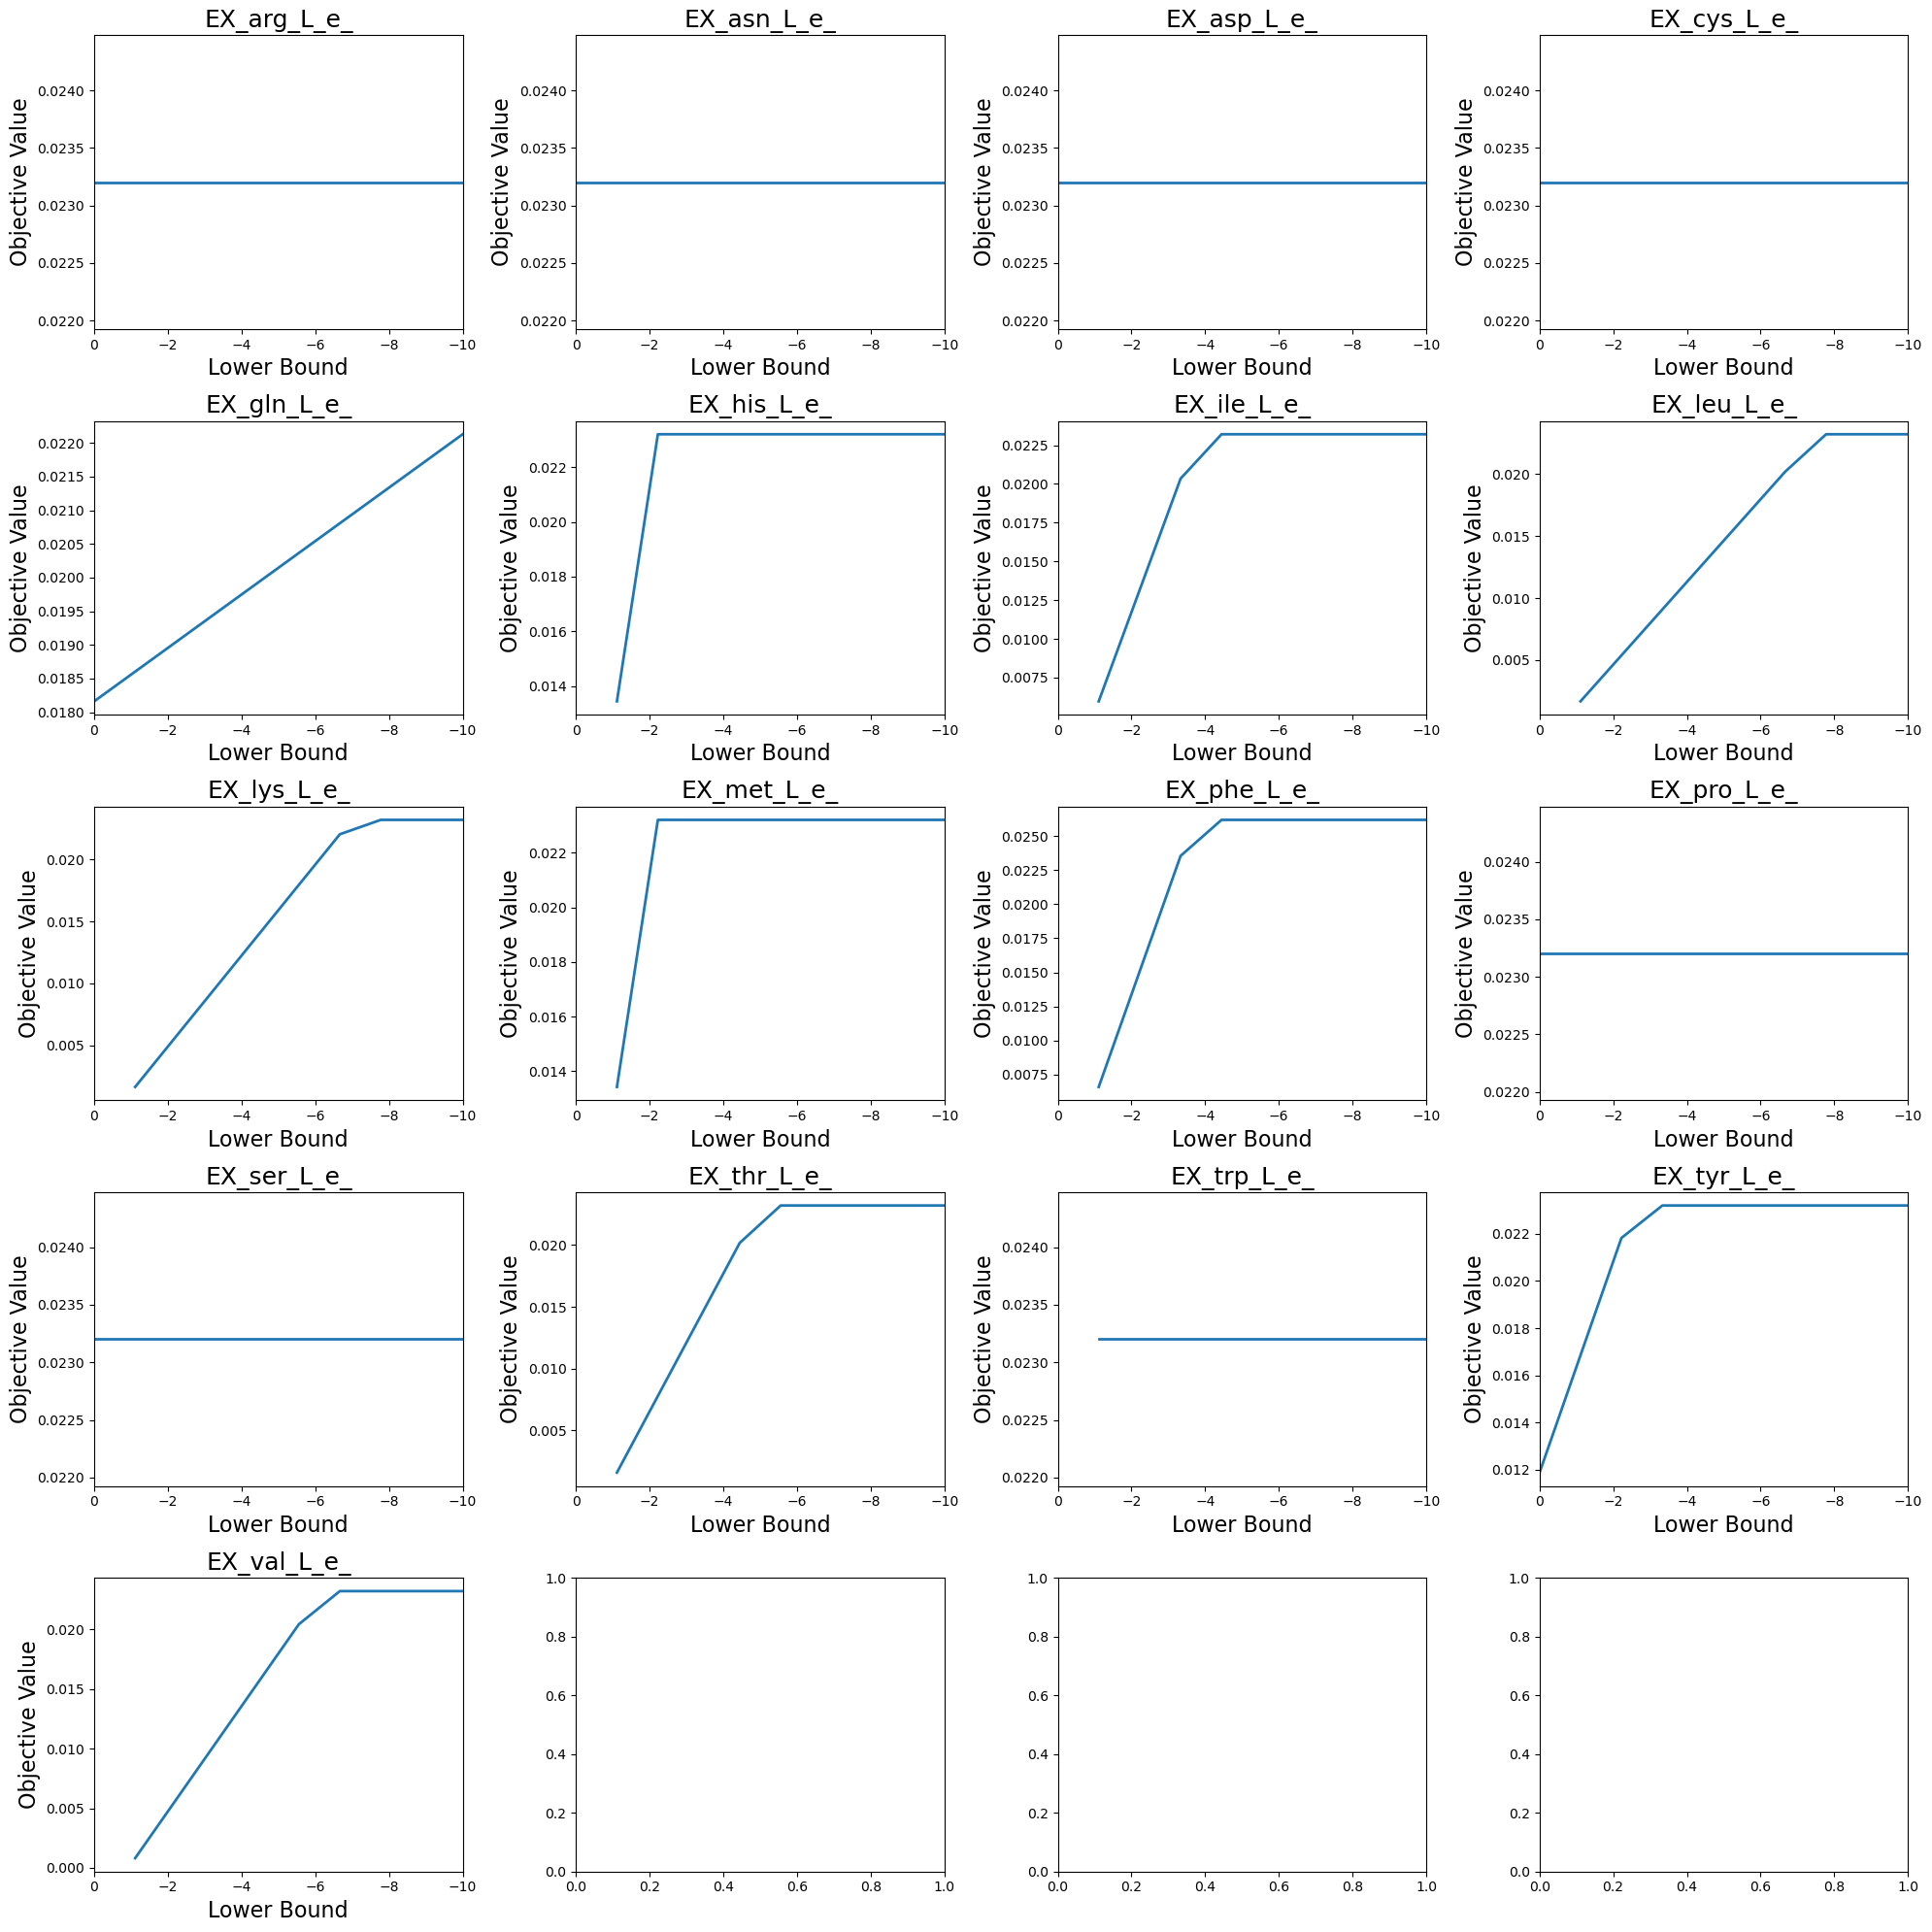

In [26]:
# Determine the number of rows and columns based on the number of reactions
num_reactions = len(aa_rxn)
num_rows = 5
num_cols = 4

# Calculate the number of subplots required
num_subplots = min(num_reactions, num_rows * num_cols)

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Define the x-axis range
x_range = np.linspace(0, -10, 10)

# Iterate through the reactions and plot them individually
for idx, rxn in enumerate(aa_rxn):
        ax = axes[idx]
        ax.plot(x_range, df[rxn], linewidth = 2.0)
        ax.set_title(rxn, fontsize=18)
        ax.set_xlabel('Lower Bound', fontsize=16)
        ax.set_ylabel('Objective Value', fontsize=16)
        ax.set_xlim(0, -10)  # Set the x-axis limits
        
plt.tight_layout()
plt.show()

# Essential reactions

In [27]:
xiang_genes = pd.read_csv("../1_CriGr_model_ref_Data/essentialGenesXiang2021_ensembl.csv",
                         dtype = {'ensembl_gene_id': 'str',
                                   'entrezgene_id':'str'})
modelGenes = []
for g in model.genes:
    modelGenes.append(g.id)

essential_modelGenes = xiang_genes[xiang_genes["entrezgene_id"].isin(modelGenes)]
essential_modelGenes

essential_modelGenes_reactions = []
essential_modelGenes_reactions_g = []    # All the genes associate with that rxn, not just the essential one
for g in essential_modelGenes["entrezgene_id"]:
    rxns = model.genes.get_by_id(g).reactions
    for r in rxns:
        essential_modelGenes_reactions.append(r.id)
        essential_modelGenes_reactions_g.append(str(r.gpr))
essential_reactions = pd.DataFrame({
    "reactions":essential_modelGenes_reactions,
    "grr":essential_modelGenes_reactions_g
}).drop_duplicates()
essential_reactions
essential_reactions.to_csv("../1_CriGr_model_ref_Data/essentialReactions_Xiang2021_ichov1.csv")

In [28]:
#r = model.reactions[1]
comps = {}
funcs = {}
subsys = {}

for r in model.reactions:
    
    if r.compartments != '':
        comps[r.id] = r.compartments
    
    #if r.functional != '':
    funcs[r.id] = r.functional
    
    if r.subsystem != '':
        subsys[r.id] =  r.subsystem
    
comps

{'COKECBESr': {'r'},
 'EGMESTr': {'r'},
 'NMPTRCOX': {'c'},
 'PRO1x': {'c'},
 'DHDDH': {'c'},
 'EPOH': {'c'},
 '4NPHSULT': {'c'},
 'FAH1': {'c'},
 'FAH2': {'c'},
 'FAH3': {'c'},
 'P4502A6': {'c'},
 'P4502C18': {'c'},
 'P4502C19': {'c'},
 'P4502C8': {'c'},
 'P4502C9': {'c'},
 'P4502D6': {'c'},
 'P4502E1': {'c'},
 'P4502F1': {'c'},
 'P4503A4': {'c'},
 'P4503A5': {'c'},
 'P4504F123r': {'r'},
 'FAS100ACP': {'c'},
 'FAS140ACP': {'c'},
 'FAS160ACP': {'c'},
 'FAS180ACP': {'c'},
 'FAS80ACP_L': {'c'},
 'FAS80ACPxym_L': {'m'},
 'KAS8': {'c'},
 'ACCOAC': {'c'},
 'PTE1x': {'x'},
 'BMTer': {'r'},
 'GPIMTer': {'r'},
 'H2MTer': {'r'},
 'H3MTer': {'r'},
 'H5MTer': {'r'},
 'H6MTer': {'r'},
 'H7MTer': {'r'},
 'H8MTer': {'r'},
 'FBA4': {'c'},
 'GCALDD': {'c'},
 'GCALDDm': {'m'},
 'GLXO1': {'c'},
 'GLXO2p': {'x'},
 'GLYCK2': {'c'},
 'GLYCTO1p': {'x'},
 'HPI': {'c'},
 'HPYRR2x': {'c'},
 'HPYRRx': {'c'},
 'PGLYCP': {'c'},
 'C2M26DCOAHLm': {'m'},
 'C2M26DCOAHLx': {'x'},
 'P4502C92': {'c'},
 'P4502C93': {'c'}

In [29]:
genes = []
for g in model.genes:
    genes.append(g.id)

pd.DataFrame({
    "NCBI":genes
}).to_csv("genes_mapped.csv")

In [30]:
blocked = cobra.flux_analysis.find_blocked_reactions(model)

In [31]:
pd.DataFrame({
    "reaction_id":blocked,
    "reaction_name":[model.reactions.get_by_id(i).name for i in blocked],
    "reaction_compartment":[model.reactions.get_by_id(i).compartments for i in blocked]
}).to_csv("iCHOv1_221-107_producing_blockedReactions.csv")

In [35]:
from cobra.io import write_sbml_model
write_sbml_model(model, "iCHOv1_221-107_producing.xml")

In [33]:
tmp = {}
for i in model.reactions:
    if i.subsystem != "":
        if i.subsystem not in tmp.keys():
            tmp[i.subsystem] = 1
        else:
            tmp[i.subsystem] += 1
tmp

{'ALKALOID SYNTHESIS': 5,
 'ARGININE AND PROLINE METABOLISM': 46,
 'CYP METABOLISM': 2,
 'CYTOCHROME METABOLISM': 15,
 'FATTY ACID ELONGATION': 8,
 'FATTY ACID METABOLISM': 2,
 'GLYCOSYLPHOSPHATIDYLINOSITOL (GPI)-ANCHOR BIOSYNTHESIS': 8,
 'GLYOXYLATE AND DICARBOXYLATE METABOLISM': 17,
 'LIMONENE AND PINENE DEGRADATION': 9,
 'METHIONINE METABOLISM': 2,
 'N-GLYCAN BIOSYNTHESIS': 150,
 'PHENYLALANINE METABOLISM': 12,
 'PROPANOATE METABOLISM': 12,
 'TRANSPORT, EXTRACELLULAR': 1433,
 'UREA CYCLE/AMINO GROUP METABOLISM': 5,
 'VITAMIN B12 METABOLISM': 3,
 'VITAMIN C METABOLISM': 14,
 'VITAMIN D': 1,
 'AMINO ACID DERIVATIVE': 1,
 'ARACHIDONIC ACID METABOLISM': 73,
 'ASCORBATE AND ALDARATE METABOLISM': 1,
 'BILE ACID SYNTHESIS': 105,
 'CHOLESTEROL METABOLISM': 49,
 'CHONDROITIN SYNTHESIS': 45,
 'COA CATABOLISM': 5,
 'FATTY ACID SYNTHESIS': 83,
 'FRUCTOSE AND MANNOSE METABOLISM': 27,
 'GALACTOSE METABOLISM': 10,
 'GLUTAMATE METABOLISM': 15,
 'GLYCEROLIPID METABOLISM': 1,
 'KERATAN SULFATE DEGRAD

In [34]:
tmp = pd.DataFrame({
    "reaction_id":blocked,
    "reaction_name":[model.reactions.get_by_id(i).name for i in blocked],
    "reaction_compartment":[model.reactions.get_by_id(i).compartments for i in blocked]
})

tmp[tmp["reaction_id"] == "igg_lc"]

,reaction_id,reaction_name,reaction_compartment
